## **Quantum Computation: Experimentation with Qiskit**

**Block Sphere:** This notebook is an experimentation with the qiskit runtime environment. It is also used for learning about the Bloch Sphere Representation using code.

1) Installing Qiskit

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=2fd7c4eb6c28157c981766de260cf3dbd6587bffa8d6a33d052497b930fb173c
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


Qiskit Examples (from https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems)

The following four examples use numpy to simulate qubits and operators.

In [ ]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

In [ ]:
ket0 / 2 + ket1 / 2

array([0.5, 0.5])

In [ ]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

In [ ]:
from numpy import matmul

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

The following examples are use quantum computation.

In [ ]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])
z = Statevector([sqrt(3) / 2, 1 / 2])

print("State vectors u, v, w and z have been defined.")

State vectors u, v, w and z have been defined.


In [ ]:
display(u.draw("latex"))
display(v.draw("text"))
display(w.draw("text"))
display(z.draw("latex"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

[0.33333333+0.j,0.66666667+0.j]

<IPython.core.display.Latex object>

In [ ]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())
display(z.is_valid())

True

True

False

True

In [ ]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
z.measure()

('1',
 Statevector([0.+0.j, 1.+0.j],
             dims=(2,)))

{'0': 55672, '1': 44328}

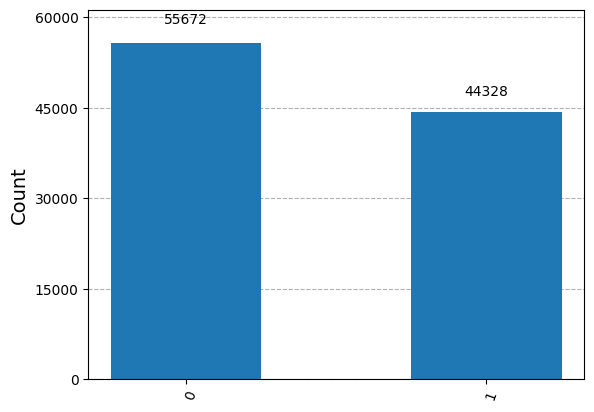

In [ ]:
## Code for measurement
## Re-run to get different results

from qiskit.visualization import plot_histogram

statistics = v.sample_counts(100000)
display(statistics)
plot_histogram(statistics)

In [ ]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])
w = Statevector([1, 0])

v = v.evolve(X)
v = v.evolve(H)

w = w.evolve(H)
w = w.evolve(Z)

##v.draw("text")
##v.draw("latex")

w.draw("text")
w.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [ ]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

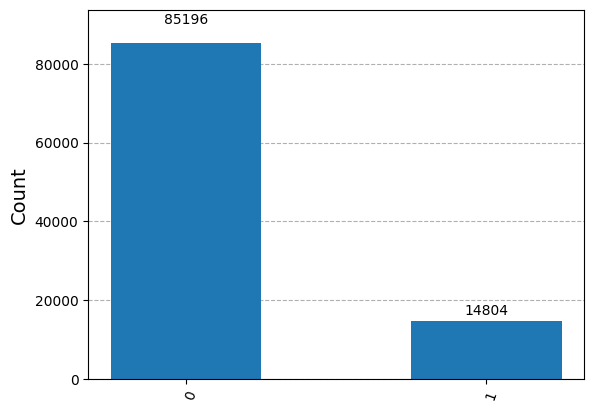

In [ ]:
statistics = v.sample_counts(100000)
plot_histogram(statistics)

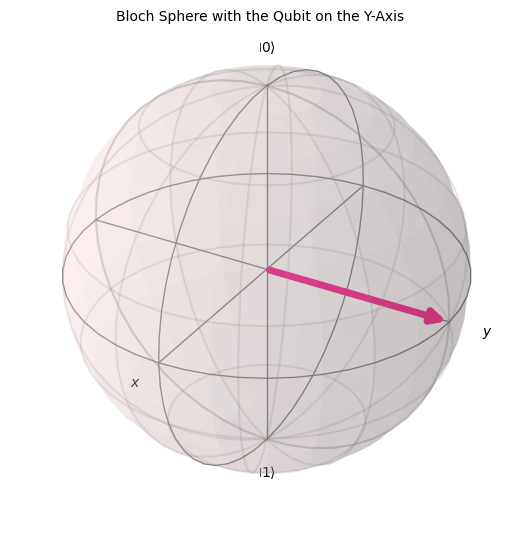

In [ ]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector([0,1,0], title="Bloch Sphere with the Qubit on the Y-Axis")

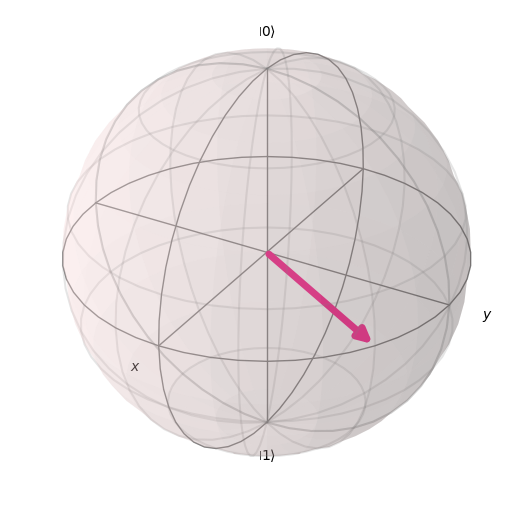

In [ ]:
import numpy as np
from qiskit.visualization import plot_bloch_vector

# You can use spherical coordinates instead of cartesian.

plot_bloch_vector([1, np.pi/2, np.pi/3], coord_type='spherical')

IndexError: index 2 is out of bounds for axis 0 with size 2

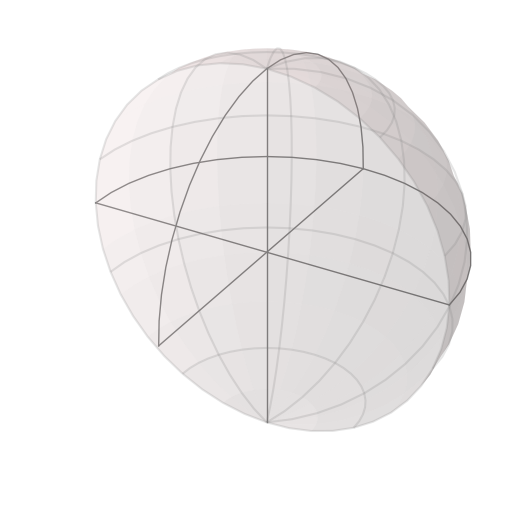

In [ ]:
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Statevector
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Define the qubit statevector u = (1/√2)|0⟩ + (1/√2)|1⟩
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])

# Get the Bloch vector from the statevector
bloch_vector = u.to_operator().data[:3]  # Extract first three elements as Bloch vector

# Plot the Bloch vector on the Bloch sphere
plot_bloch_vector(np.real(bloch_vector))  # Plot the real part of the vector
plt.show()